# Recurrent Neural Network

This is a pure numpy implementation of word generation using an RNN

![alt text](http://corochann.com/wp-content/uploads/2017/05/text_sequence_predict.png "Logo Title Text 1")

We're going to have our network learn how to predict the next words in a given paragraph. This will require a recurrent architecture since the network will have to remember a sequence of characters. The order matters. 1000 iterations and we'll have pronouncable english. The longer the training time the better. You can feed it any text sequence (words, python, HTML, etc.)

## What is a Recurrent Network?

Feedforward networks are great for learning a pattern between a set of inputs and outputs.
![alt text](https://www.researchgate.net/profile/Sajad_Jafari3/publication/275334508/figure/fig1/AS:294618722783233@1447253985297/Fig-1-Schematic-of-the-multilayer-feed-forward-neural-network-proposed-to-model-the.png "Logo Title Text 1")

![alt text](https://s-media-cache-ak0.pinimg.com/236x/10/29/a9/1029a9a0534a768b4c4c2b5341bdd003--city-year-math-patterns.jpg "Logo Title Text 1")

![alt text](https://www.researchgate.net/profile/Hamza_Guellue/publication/223079746/figure/fig5/AS:305255788105731@1449790059371/Fig-5-Configuration-of-a-three-layered-feed-forward-neural-network.png
 "Logo Title Text 1")

- temperature & location
- height & weight
- car speed and brand

But what if the ordering of the data matters? 

![alt text](http://www.aboutcurrency.com/images/university/fxvideocourse/google_chart.jpg "Logo Title Text 1")

![alt text](http://news.mit.edu/sites/mit.edu.newsoffice/files/styles/news_article_image_top_slideshow/public/images/2016/vondrick-machine-learning-behavior-algorithm-mit-csail_0.jpg?itok=ruGmLJm2 "Logo Title Text 1")

Alphabet, Lyrics of a song. These are stored using Conditional Memory. You can only access an element if you have access to the previous elements (like a linkedlist). 

Enter recurrent networks

We feed the hidden state from the previous time step back into the the network at the next time step.

![alt text](https://iamtrask.github.io/img/basic_recurrence_singleton.png "Logo Title Text 1")

So instead of the data flow operation happening like this

## input -> hidden -> output

it happens like this

## (input + prev_hidden) -> hidden -> output

wait. Why not this?

## (input + prev_input) -> hidden -> output

Hidden recurrence learns what to remember whereas input recurrence is hard wired to just remember the immediately previous datapoint

![alt text](https://image.slidesharecdn.com/ferret-rnn-151211092908/95/recurrent-neural-networks-part-1-theory-10-638.jpg?cb=1449826311 "Logo Title Text 1")

![alt text](https://www.mathworks.com/help/examples/nnet/win64/RefLayRecNetExample_01.png "Logo Title Text 1")

RNN Formula
![alt text](https://cdn-images-1.medium.com/max/1440/0*TUFnE2arCrMrCvxH.png "Logo Title Text 1")

It basically says the current hidden state h(t) is a function f of the previous hidden state h(t-1) and the current input x(t). The theta are the parameters of the function f. The network typically learns to use h(t) as a kind of lossy summary of the task-relevant aspects of the past sequence of inputs up to t.

Loss function

![alt text](https://cdn-images-1.medium.com/max/1440/0*ZsEG2aWfgqtk9Qk5. "Logo Title Text 1")

The total loss for a given sequence of x values paired with a sequence of y values would then be just the sum of the losses over all the time steps. For example, if L(t) is the negative log-likelihood
of y (t) given x (1), . . . , x (t) , then sum them up you get the loss for the sequence 


## Our steps

- Initialize weights randomly
- Give the model a char pair (input char & target char. The target char is the char the network should guess, its the next char in our sequence)
- Forward pass (We calculate the probability for every possible next char according to the state of the model, using the paramters)
- Measure error (the distance between the previous probability and the target char)
- We calculate gradients for each of our parameters to see their impact they have on the loss (backpropagation through time)
- update all parameters in the direction via gradients that help to minimise the loss
- Repeat! Until our loss is small AF

## What are some use cases?

- Time series prediction (weather forecasting, stock prices, traffic volume, etc. )
- Sequential data generation (music, video, audio, etc.)

## Other Examples

-https://github.com/anujdutt9/RecurrentNeuralNetwork (binary addition)

## What's next? 

1. LSTM Networks
2. Bidirectional networks
3. recursive networks

## The code contains 4 parts
* Load the trainning data
  * encode char into vectors
* Define the Recurrent Network
* Define a loss function
  * Forward pass
  * Loss
  * Backward pass
* Define a function to create sentences from the model **[CRUCIAL & IMPACTFUL STEP]**
* Train the network
  * Feed the network
  * Calculate gradient and update the model parameters
  * Output a text to see the progress of the training
 

## Load the training data

The network need a big txt file as an input. **[WHAT IS "BIG"?]**

The content of the file will be used to train the network.

I use Methamorphosis from Kafka (Public Domain). Because Kafka was one weird dude. I like.

In [1]:
data = open('kafka.txt', 'r').read()

chars = list(set(data)) 
data_size, vocab_size = len(data), len(chars)
print 'data has %d chars, %d unique' % (data_size, vocab_size)

data has 137629 chars, 81 unique


### Encode/Decode char/vector

- Neural networks operate on vectors (a vector is an array of float)
- So we need a way to encode and decode a char as a vector.

- We'll count the number of unique chars (*vocab_size*). **[Compare to bag-of-words model]**
- That will be the size of the vector. 
- The vector contains only zero exept for the position of the char where the value is 1 **(1-hot Encoding)**.

#### So First let's calculate the *vocab_size*:

In [4]:
##Mapping Tables

char_to_ix = { ch:i for i,ch in enumerate(chars)}
ix_to_char = { i:ch for i, ch in enumerate(chars)}
print char_to_ix
print ''
print ix_to_char

{'\n': 0, 'C': 31, '!': 3, ' ': 4, '"': 5, '%': 6, '$': 7, "'": 8, ')': 9, '(': 10, '*': 11, '-': 12, ',': 13, '/': 2, '.': 15, '1': 16, '0': 17, '3': 18, '2': 19, '5': 20, '4': 21, '7': 22, '6': 23, '9': 24, '8': 25, ';': 26, ':': 27, '?': 28, 'A': 29, '@': 30, '\xc3': 1, 'B': 32, 'E': 33, 'D': 34, 'G': 35, 'F': 36, 'I': 37, 'H': 38, 'K': 39, 'J': 40, 'M': 41, 'L': 42, 'O': 43, 'N': 44, 'Q': 45, 'P': 46, 'S': 47, 'R': 48, 'U': 49, 'T': 50, 'W': 51, 'V': 52, 'Y': 53, 'X': 54, 'd': 59, 'a': 55, 'c': 56, 'b': 57, 'e': 58, '\xa7': 14, 'g': 60, 'f': 61, 'i': 62, 'h': 63, 'k': 64, 'j': 65, 'm': 66, 'l': 67, 'o': 68, 'n': 69, 'q': 70, 'p': 71, 's': 72, 'r': 73, 'u': 74, 't': 75, 'w': 76, 'v': 77, 'y': 78, 'x': 79, 'z': 80}

{0: '\n', 1: '\xc3', 2: '/', 3: '!', 4: ' ', 5: '"', 6: '%', 7: '$', 8: "'", 9: ')', 10: '(', 11: '*', 12: '-', 13: ',', 14: '\xa7', 15: '.', 16: '1', 17: '0', 18: '3', 19: '2', 20: '5', 21: '4', 22: '7', 23: '6', 24: '9', 25: '8', 26: ';', 27: ':', 28: '?', 29: 'A', 30: 

#### Then we create 2 dictionary to encode and decode a char to an int

In [7]:
char_to_ix['a']

55

#### Finaly we create a vector from a char like this:
- The dictionary defined above allows us to create a vector of size 61 instead of 256.  
- Here and exemple of the char 'a'  
- The vector contains only zeros, except at position char_to_ix['a'] where we put a 1.

In [11]:
import numpy as np

vector_for_char_a = np.zeros((vocab_size, 1))
vector_for_char_a[char_to_ix['a']] = 1
print vector_for_char_a.ravel()
print ''
print vector_for_char_a.ravel()[55]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]

1.0


## Definition of the network

The neural network is made of 3 layers:
* an input layer
* an hidden layer
* an output layer

All layers are fully connected to the next one: each node of a layer are conected to all nodes of the next layer.
The hidden layer is connected to the output and to itself: the values from an iteration are used for the next one.

To centralise values that matter for the training (_hyper parameters_) we also define the _sequence lenght_ and the _learning rate_

In [12]:
#Model parameters
hidden_size = 100
seq_length = 25

#Hyperparameter
learning_rate = 1e-1

#Initialization Sampled From Uniform Distribution
Wxh = np.random.randn(hidden_size, vocab_size) * 0.01 #input to hidden
Whh = np.random.randn(hidden_size, hidden_size) * 0.01 #input to hidden
Why = np.random.randn(vocab_size, hidden_size) * 0.01 #input to hidden
bh = np.zeros((hidden_size, 1))
by = np.zeros((vocab_size, 1))

The model parameters are adjusted during the trainning.
* _Wxh_ are parameters to connect a vector that contain one input to the hidden layer.
* _Whh_ are parameters to **connect the hidden layer to itself via the previous hidden state.**
    - **This is the Key of the Rnn.** Recursion is done by injecting the previous values from the output of the hidden state, to itself at the next iteration.
    

* _Why_ are parameters to connect the hidden layer to the output
* _bh_ contains the hidden bias
* _by_ contains the output bias

You'll see in the next section how theses parameters are used to create a sentence.

## Define the loss function

The __loss__ is a key concept in all neural networks training. 
It is a value that describe how good is our model.  
The smaller the loss, the better our model is.  
(A good model is a model where the predicted output is close to the training output)
  
During the training phase we want to minimize the loss.

The loss function calculates the loss but also the gradients (see backward pass):
* It perform a forward pass: calculate the next char given a char from the training set.
* It calculate the loss by comparing the predicted char to the target char. (The target char is the input following char in the tranning set)
* It calculate the backward pass to calculate the gradients 

This function take as input:
* a list of input char
* a list of target char
* and the previous hidden state

This function outputs:
* the loss
* the gradient for each parameters between layers
* the last hidden state


### Forward pass
- The forward pass uses the parameters of the model (Wxh, Whh, Why, bh, by) to calculate the next char given a char from the training set.

- xs[t] is the vector that encode the char at position t
- ps[t] is the **probabilities** for next char

![alt text](https://deeplearning4j.org/img/recurrent_equation.png "Logo Title Text 1")

```python
hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state
ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars
ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars via SOFTMAX transformation
```

Dirty pseudo code for each char
```python
hs = Wxh*input + Whh*last_value_of_hidden_state + bh
ys = Why*hs + by
ps = softmax_normalized(ys)
```

### Backward pass

The naive way to calculate all gradients would be to recalculate a loss for small variations for each parameters.
This is possible but would be time consuming.
There is a technique to calculates all the gradients for all the parameters at once: the backpropagation.  
Gradients are calculated in the opposite order of the forward pass, using a simple technique.  

#### goal is to calculate gradients for the forward formula:
```python
hs = input*Wxh + last_value_of_hidden_state*Whh + bh  
ys = hs*Why + by
```

The loss for one datapoint
![alt text](http://i.imgur.com/LlIMvek.png "Logo Title Text 1")

How should the computed scores inside f change tto decrease the loss? We'll need to derive a gradient to figure that out.

Since all output units contribute to the error of each hidden unit we sum up all the gradients calculated at each time step in the sequence and use it to update the parameters. So our parameter gradients becomes :

![alt text](http://i.imgur.com/Ig9WGqP.png "Logo Title Text 1")

Our first gradient of our loss. We'll backpropagate this via chain rule

![alt text](http://i.imgur.com/SOJcNLg.png "Logo Title Text 1")

The chain rule is a method for finding the derivative of composite functions, or functions that are made by combining one or more functions.

![alt text](http://i.imgur.com/3Z2Rfdi.png "Logo Title Text 1")

![alt text](http://mathpullzone-8231.kxcdn.com/wp-content/uploads/thechainrule-image3.jpg "Logo Title Text 1")

![alt text](https://i0.wp.com/www.mathbootcamps.com/wp-content/uploads/thechainrule-image1.jpg?w=900 "Logo Title Text 1")


In [13]:

def lossFun(inputs, targets, hprev):
    """                                                                                                                                                                                         
    inputs,targets are both list of integers.                                                                                                                                                   
    hprev is Hx1 array of initial hidden state                                                                                                                                                  
    returns the loss, gradients on model parameters, and last hidden state                                                                                                                      
    """
    #store our inputs, hidden states, outputs, and probability values
    xs, hs, ys, ps, = {}, {}, {}, {} #Empty dicts
    # Each of these are going to be SEQ_LENGTH(Here 25) long dicts i.e. 1 vector per time(seq) step
    # xs will store 1 hot encoded input characters for each of 25 time steps (26, 25 times)
    # hs will store hidden state outputs for 25 time steps (100, 25 times)) plus a -1 indexed initial state
    # to calculate the hidden state at t = 0
    # ys will store targets i.e. expected outputs for 25 times (26, 25 times), unnormalized probabs
    # ps will take the ys and convert them to normalized probab for chars
    # We could have used lists BUT we need an entry with -1 to calc the 0th hidden layer
    # -1 as  a list index would wrap around to the final element
    xs, hs, ys, ps = {}, {}, {}, {}
    #init with previous hidden state
    # Using "=" would create a reference, this creates a whole separate copy
    # We don't want hs[-1] to automatically change if hprev is changed
    hs[-1] = np.copy(hprev)
    #init loss as 0
    loss = 0
    # forward pass                                                                                                                                                                              
    for t in xrange(len(inputs)):
        xs[t] = np.zeros((vocab_size,1)) # encode in 1-of-k representation (we place a 0 vector as the t-th input)                                                                                                                     
        xs[t][inputs[t]] = 1 # Inside that t-th input we use the integer in "inputs" list to  set the correct
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh) # hidden state                                                                                                            
        ys[t] = np.dot(Why, hs[t]) + by # unnormalized log probabilities for next chars                                                                                                           
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t])) # probabilities for next chars                                                                                                              
        loss += -np.log(ps[t][targets[t],0]) # softmax (cross-entropy loss)                                                                                                                       
    
    # backward pass: compute gradients going backwards    
    #initalize vectors for gradient values for each set of weights 
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])
  
    for t in reversed(xrange(len(inputs))):
        #output probabilities
        dy = np.copy(ps[t])
        
        #derive our first gradient
        dy[targets[t]] -= 1 # backprop into y  
        
        #Compute output gradient -  output times hidden states transpose
        #  When we apply the transpose weight matrix,  
        #  we can think intuitively of this as moving the error backward
        #  through the network, giving us some sort of measure of the error 
        #  at the output of the lth layer. 
        
        #output gradient
        dWhy += np.dot(dy, hs[t].T)
        
        #derivative of output bias
        dby += dy
        
        #backpropagate!
        dh = np.dot(Why.T, dy) + dhnext # backprop into h                                                                                                                                         
        dhraw = (1 - hs[t] * hs[t]) * dh # backprop through tanh nonlinearity                                                                                                                     
        dbh += dhraw #derivative of hidden bias
        dWxh += np.dot(dhraw, xs[t].T) #derivative of input to hidden layer weight
        dWhh += np.dot(dhraw, hs[t-1].T) #derivative of hidden layer to hidden layer weight
        dhnext = np.dot(Whh.T, dhraw) 
    
    for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
        np.clip(dparam, -5, 5, out=dparam) # clip to mitigate exploding gradients                                                                                                                 
    
    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]
    

## Create a sentence from the model

In [14]:
#prediction, one full forward pass
def sample(h, seed_ix, n):
    """                                                                                                                                                                                         
    sample a sequence of integers from the model                                                                                                                                                
    h is memory state, seed_ix is seed letter for first time step   
    n is how many characters to predict
    """
    #create vector
    x = np.zeros((vocab_size, 1))
    
    #customize it for our seed char
    x[seed_ix] = 1
    
    #list to store generated chars
    ixes = []
    
    #for as many characters as we want to generate
    for t in xrange(n):
        #A hidden state at a given time step is a function 
        #  of (1) the input at the same time step modified by a weight matrix 
        #  added to (2) the hidden state of the previous time step 
        #  multiplied by its own hidden state to hidden state matrix.
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        
        #compute output (unnormalised)
        y = np.dot(Why, h) + by
        
        ## probabilities for next chars
        p = np.exp(y) / np.sum(np.exp(y))
        
        #pick one with the highest probability (not exactly)
        #--This implementation is not strictly mathematically correct
        #--it allows for random sampling using the probability distribution
        #--specified by p. If stochastic sampling is meant to be used
        #--as perturbation to prevent overfitting in training, then it is correct.
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        
        #create a vector
        x = np.zeros((vocab_size, 1))
        
        #customize it for the predicted char
        x[ix] = 1
        
        #add it to the list
        ixes.append(ix)

    txt = ''.join(ix_to_char[ix] for ix in ixes)
    print '----\n %s \n----' % (txt, )
    
# reset RNN memory 
hprev = np.zeros((hidden_size,1)) 

#predict the 200 next characters given 'a'
sample(hprev,char_to_ix['a'],200)

----
 sA:Hg)q@T�w
2�*,pR�s7�B6zBCU'xa1Lm4x8jdW5iyEtc*DtE6a1*AS'kFT!-'LQ:(rmlV:A�l?qX1K8
AwA%(aq$h6AYBj"�4u yf%jGO�/s0(ltIX 2�qRYvRfB9j6El6RG�vhatQWvik$!ISnjVsNqPa0hkvQ7NXG5*(XgnF5nOyq1xB�4kjk%Qcox s8.PNUfL? 
----



## Training

This last part of the code is the main training loop:
* Feed the network with portion of the file. Size of chunk is *seq_lengh*
* Use the loss function to:
  * Do forward pass to calculate all parameters for the model for a given input/output pairs
  * Do backward pass to calculate all gradients
* Print a sentence from a random seed using the parameters of the network
* Update the model using the Adaptative Gradient technique **Adagrad**

### Feed the loss function with inputs and targets

We create two array of char from the data file,
the targets one is shifted compare to the inputs one.

For each char in the input array, the target array give the char that follows.

In [15]:
p=0  
inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
print "inputs", inputs
targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]
print "targets", targets

inputs [43, 69, 58, 4, 66, 68, 73, 69, 62, 69, 60, 13, 4, 76, 63, 58, 69, 4, 35, 73, 58, 60, 68, 73, 4]
targets [69, 58, 4, 66, 68, 73, 69, 62, 69, 60, 13, 4, 76, 63, 58, 69, 4, 35, 73, 58, 60, 68, 73, 4, 47]


### Adagrad to update the parameters

This is a type of gradient descent strategy

![alt text](http://www.logos.t.u-tokyo.ac.jp/~hassy/deep_learning/adagrad/adagrad2.png
 "Logo Title Text 1")



step size = learning rate

The easiest technics to update the parmeters of the model is this:

```python
param += dparam * step_size
```
Adagrad is a more efficient technique where the step_size are getting smaller during the training.

It use a memory variable that grow over time:
```python
mem += dparam * dparam
```
and use it to calculate the step_size:
```python
step_size = 1./np.sqrt(mem + 1e-8)
```
In short:
```python
mem += dparam * dparam
param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update 
```

### Smooth_loss

Smooth_loss doesn't play any role in the training.
It is just a low pass filtered version of the loss:
```python
smooth_loss = smooth_loss * 0.999 + loss * 0.001
```

It is a way to average the loss on over the last iterations to better track the progress


### So finally
Here the code of the main loop that does both trainning and generating text from times to times:

In [18]:
n, p = 0, 0
mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
mbh, mby = np.zeros_like(bh), np.zeros_like(by) # memory variables for Adagrad                                                                                                                
smooth_loss = -np.log(1.0/vocab_size)*seq_length # loss at iteration 0  

track_loss = []
track_iter = []

while n<=1000*100:
    # prepare inputs (we're sweeping from left to right in steps seq_length long)
    # check "How to feed the loss function to see how this part works
    if p+seq_length+1 >= len(data) or n == 0:
        hprev = np.zeros((hidden_size,1)) # reset RNN memory                                                                                                                                      
        p = 0 # go from start of data                                                                                                                                                             
    inputs = [char_to_ix[ch] for ch in data[p:p+seq_length]]
    targets = [char_to_ix[ch] for ch in data[p+1:p+seq_length+1]]

    # forward seq_length characters through the net 
    # and fetch gradient                                                                                                                          
    loss, dWxh, dWhh, dWhy, dbh, dby, hprev = lossFun(inputs, targets, hprev)
    smooth_loss = smooth_loss * 0.999 + loss * 0.001

    #store training progress - MIKEY
    track_loss.append(loss)
    track_iter.append(n)
    
    # sample from the model now and then                                                                                                                                                        
    if n % 1000 == 0:
        print 'iter %d, loss: %f' % (n, smooth_loss) # print progress
        sample(hprev, inputs[0], 200)

    # Perform parameter update with Adagrad  -- VERY IMPORTANT                                                                                                                                                   
    for param, dparam, mem in zip([Wxh, Whh, Why, bh, by],
                                [dWxh, dWhh, dWhy, dbh, dby],
                                [mWxh, mWhh, mWhy, mbh, mby]):
        mem += dparam * dparam
        param += -learning_rate * dparam / np.sqrt(mem + 1e-8) # adagrad update                                                                                                                   

    p += seq_length # move data pointer                                                                                                                                                         
    n += 1 # iteration counter    

iter 0, loss: 109.785149
----
 h yabkem he spaly het, he coutitive, mm woll, to pusinburedy ores had trowe, worfinbed tena saply shen mlation, taning ir of wnok? Itger, atree tard Gregre Gregor gotad woughs though s, and peandmst f 
----
iter 1000, loss: 80.650069
----
  khalf actuen jetr at thras tort yo ptin hise theen teron thid, cser or wwarps sout ally serve mas the!, ftut soe hey qukeing, of erte the wingithve plek wheve ke yor'f chat qut wand eve un whird sore 
----
iter 2000, loss: 64.503807
----
 titteryto wastedy fo ilce olpoln k hiuld gry enmeecsely act fhad heather nusseaned pris has shece phe am harcter's foughe mowitnyh han be sead haid isploe he's ay eo as loulgos an nos lalf anhe hes Gr 
----
iter 3000, loss: 56.947660
----
 ld robllr thaby gabe ris bilds he go had btaw to his ldoonk them, dost he ther ibne dos wimis,re had apld.
"y him rit wald fry n be.d im, id, bay, ip sase.ads wuns whis cuf ther -omol tied. ateme hir  
----
iter 4000, loss: 53.477216
----
 he thit t

iter 35000, loss: 46.662995
----
 msieftrryims was novty the skiy a diresswer het hemwer - the head thoughtide tre ap ware statld gussentit Rhe! The doy anbeace of wid his motidhall sot sqoowe raftsed was the mongind not bly bregars n 
----
iter 36000, loss: 45.300756
----
 t hhing toon hed room dast jow and hamaid go exturd odis lo nou at had the cliemer he would someh f ge a thed and the ere buting darbe to the sas as door, to there bow had brboen to of now was him af  
----
iter 37000, loss: 45.143798
----
 

Shom not to mow his unte his moanded simienutis at. .S. He moselly out on on wit-s ho vech afte mownneraft he exse fouf woor had from annos bely ingant.'s aly, in aglo herly on a ooter and cond, was 
----
iter 38000, loss: 47.557436
----
 ressing Gregor fatad oute ans fich of thaye, tituleed wouch therewt cussens of cightmat
eatlore workioussenmirst the by kech to the mayrent bupsed ordion sooped munts.

Bupp, Gregoos of Gregor difde f 
----
iter 39000, loss: 49.675683
----
 du

iter 69000, loss: 43.614220
----
 oraly saneny out and was way what out ho had spay:: Heled clerttend reast what some in himunsice where then fralst only him stre hI, would that the walked that then time murst hice
Gregor, suret and u 
----
iter 70000, loss: 43.498591
----
 atem. Yook room. An seiny could muster noncelbutiln ad not had sotent in the tha tast the they of thing he nogmed to days. On deik sale was the oumefly staed seat the theme" with cheing anwing himentt 
----
iter 71000, loss: 45.642971
----
 e p"ay sting t ture this ralout shem someerst bilf in th Arder.

Soon in fachening faclost litine anise a ehen
cims iving fransing the cotlarter and spite peypey/n1
in it Dustay Gregor wicke time usin 
----
iter 72000, loss: 47.692789
----
 es noved workat topidid more that gonengand of tht plistoming for the prow a ber ter douh from wfftriogs dist thought sistion an gond'r, the thought moing quigun Save theis dissent thonge bive his ak  
----
iter 73000, loss: 45.721605
----
 t 

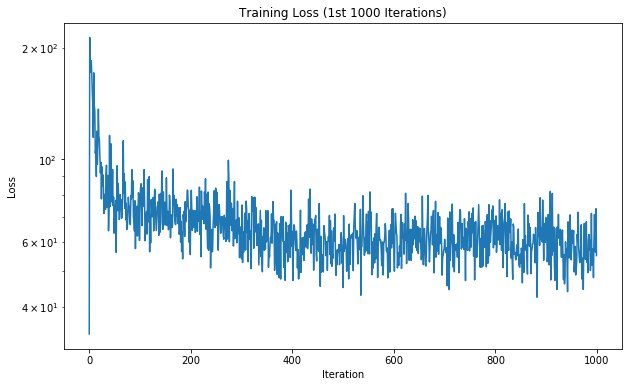

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(track_iter[0:1000],track_loss[0:1000])
plt.yscale('log')
plt.title('Training Loss (1st 1000 Iterations)')
plt.xlabel('Iteration')
plt.ylabel('Loss')

**NOTE:** The diagnostic plot plateaus after ~1000 iteration suggesting that the AdaGrad update may have saturated, reducing the effective learning rate to 0. To test this, change the optimizer to AdaDelta and see if the loss gets better compared to the AdaGrad results.